In [28]:
import os
import configparser
import os.path as osp
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style='whitegrid')
# sns.set(rc={'figure.figsize':(11.7,8.27)})

In [29]:
def get_dataset_path(dataset_name: str) -> str:
    config_path = osp.join(os.getcwd(), 'config.ini')
    parser = configparser.ConfigParser()
    parser.read(config_path)
    data_path = None
    if dataset_name == 'DCU_NVT_EXP1':
        data_path = parser['DATA_PATH']['dcu_nvt_dataset_path']
    elif dataset_name in ['WESAD_CHEST', 'WESAD_WRIST']:
        data_path = parser['DATA_PATH']['wesad_dataset_path']
    elif dataset_name == 'AffectiveROAD':
        data_path = parser['DATA_PATH']['affectiveROAD_dataset_path']
    return data_path

In [30]:
def load_stats_feature(dataset_name: str):
    data_path = get_dataset_path(dataset_name)
    data_path = osp.join(data_path, f'{dataset_name}_stats_feats.npy')
    stats_feature = np.load(data_path)
    return stats_feature

In [31]:
def load_group(dataset_name: str):
    data_path = get_dataset_path(dataset_name)
    data_path = osp.join(data_path, f'{dataset_name}_groups.npy')
    groups = np.load(data_path)
    return groups

In [32]:
dataset_name = 'DCU_NVT_EXP1'
dataset_name = 'WESAD_CHEST'
dataset_name = 'AffectiveROAD'
dataset_name = 'WESAD_WRIST'

In [33]:
stats_feature = load_stats_feature(dataset_name)
groups = load_group(dataset_name)
data = pd.DataFrame(data=stats_feature)

In [34]:
column_name = ['mean_scl', 'std_scl', 'std_scr', 'corr', 'num_responses', 'sum_scr_response_duration', 'sum_scr_amplitude', 'area_of_response_curve', 'num_scr_peaks', 'mean_eda', 'std_eda', 'min_eda', 'max_eda', 'eda_dynamic_range',
'mean_scr', 'max_scr', 'min_scr', 'kurtosis_scr', 'skewness_scr', 'mean_first_grad', 'std_first_grad', 'mean_second_grad', 'std_second_grad', 'mean_peaks', 'max_peaks' 'min_peaks', 'std_peaks', 'mean_onsets', 'max_onsets', 'min_onsets', 'std_onsets', 'ALSC', 'INSC', 'APSC', 'RMSC']

<AxesSubplot:>

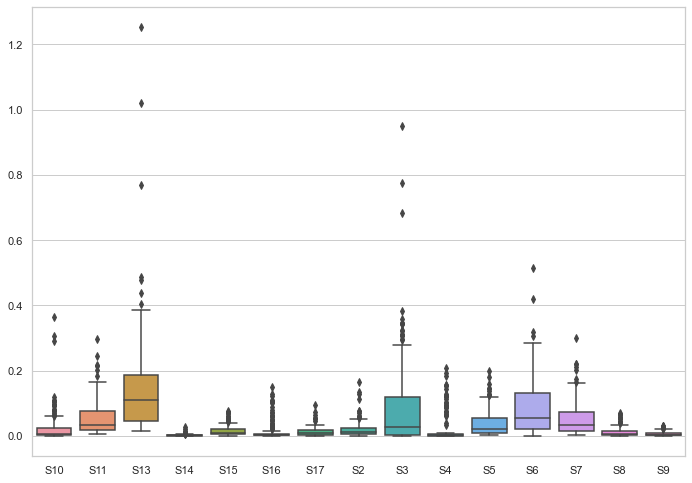

In [42]:
sns.boxplot(x=groups, y=stats_feature[:, 1])

In [ ]:
os.getcwd()